In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [2]:
# Definiton of the function that creates the data set.
def genDataSet(N, seed):
    # Reset PN generator.
    np.random.seed(seed)
    # Attribute.
    x = np.linspace(-6, 6, N).reshape(N, 1)
    # Fifth order target function.
    y = 2.33*x**5 + 5.3*x**4 - 3.2*x**3 + 0.5*x**2 - x + 2
    # Noise.
    w = np.random.randn(N, 1)
    # Observable function.
    y_noisy = y + w
    # Return arrays.
    return x, y_noisy, y

## Generate the dataset.

+ Função objetivo é um polinômio de ordem 5.

In [3]:
# Define number of samples.
N = 100

# Reset pseudo random generator.
seed = 0#6

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

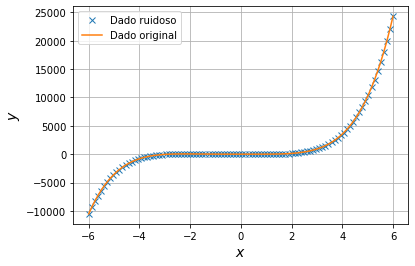

In [4]:
# Plot original data versus noisy version.
fig = plt.figure()
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y, label='Dado original')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## Holdout with different split sizes and Shuffle=True

A estratégia de validação cruzada do holdout é implementada com a função `train_test_split`.

Exemplo utilizando uma função objetivo de ordem 5 e um polinômio aproximador também de ordem 5.

In [5]:
mse_val = []
mse_train = []

splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for split in splits:
    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=split, shuffle=True, random_state=seed)

    print('Training set size:', len(y_train))
    print('Validation set size:', len(y_val))
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)

    y_train_predict = poly_reg.predict(x_train)

    y_val_predict = poly_reg.predict(x_val)

    mse_val.append(mean_squared_error(y_val, y_val_predict))

    mse_train.append(mean_squared_error(y_train, y_train_predict))

Training set size: 90
Validation set size: 10
Training set size: 80
Validation set size: 20
Training set size: 70
Validation set size: 30
Training set size: 60
Validation set size: 40
Training set size: 50
Validation set size: 50
Training set size: 40
Validation set size: 60
Training set size: 30
Validation set size: 70
Training set size: 20
Validation set size: 80
Training set size: 10
Validation set size: 90


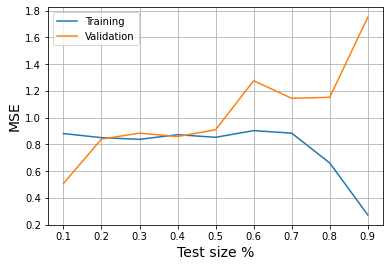

In [6]:
plt.figure()
plt.plot(splits, mse_train, label='Training')
plt.plot(splits, mse_val, label='Validation')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Test size %', fontsize=14)
plt.xticks(splits)
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Com um conjunto de 100 exemplos e esta semente (vai depender da semente como veremos a seguir) vemos que 

+ O erro de treinamento permanece praticamente constante até um conjunto de treinamento de 30% (70% para validação), depois o modelo começa a se **sobreajustar** fortemente aos dados do conjunto de treinamento, fazendo com o que erro decaia rapidamente.

+ O erro de validação cresce conforme o número de amostras do conjunto de treinamento diminui (sobreajuste). Porém, após um conjunto de treinamento com 30% do conjunto total de amostras (i.e., 70% para validação), o erro cresce muito mais rapidamente, indicando forte **sobreajuste** do modelo

## Comparing Holdout with shuffle True and False
 
### Variable test size and shuffle = True

Exemplo utilizando uma função objetivo de ordem 5 e um polinômio aproximador também de ordem 5.

In [7]:
mse_val_shuffle_on = []
mse_train_shuffle_on = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    mse_val_shuffle_on.append([])
    mse_train_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

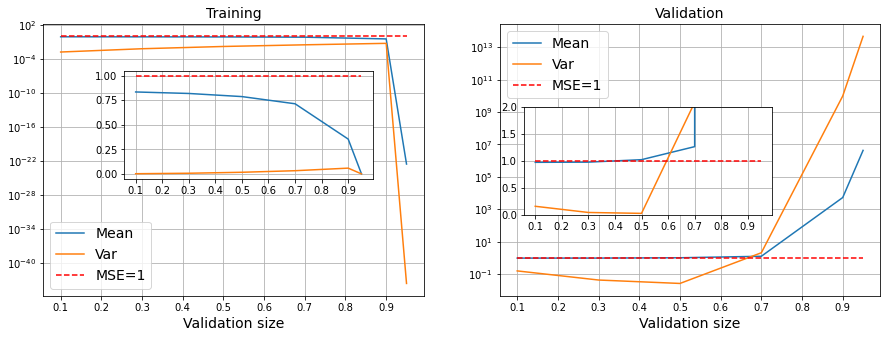

In [8]:
# Calculo da média e variância do MSE de validação para diferentes sementes.
mse_mean_val = np.zeros((len(testSizes),))
var_mean_val = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_val[k] = np.mean(mse_val_shuffle_on[k])
    var_mean_val[k] = np.var(mse_val_shuffle_on[k])

# Calculo da média e variância do MSE de treinamento para diferentes sementes.
mse_mean_train = np.zeros((len(testSizes),))
var_mean_train = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_train[k] = np.mean(mse_train_shuffle_on[k])
    var_mean_train[k] = np.var(mse_train_shuffle_on[k])

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax1.plot(testSizes, mse_mean_train, label='Mean')
ax1.plot(testSizes, var_mean_train, label='Var')
ax1.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax1.set_title('Training', fontsize=14)
ax1.set_xlabel('Validation size', fontsize=14)
ax1.grid()
ax1.legend(fontsize=14)
ax1.set_xticks(np.arange(0.1,1,0.1))
ax1.set_yscale('log')

left, bottom, width, height = [0.2, 0.45, 0.23, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(testSizes, mse_mean_train, label='Mean')
ax2.plot(testSizes, var_mean_train, label='Var')
ax2.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax2.set_xticks(np.arange(0.1,1,0.1))
ax2.grid()

ax3 = fig.add_subplot(122)
ax3.plot(testSizes, mse_mean_val, label='Mean')
ax3.plot(testSizes, var_mean_val, label='Var')
ax3.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax3.set_title('Validation', fontsize=14)
ax3.set_xlabel('Validation size', fontsize=14)
ax3.grid()
ax3.legend(fontsize=14)
ax3.set_xticks(np.arange(0.1,1,0.1))
ax3.set_yscale('log')

left, bottom, width, height = [0.57, 0.35, 0.23, 0.3]
ax4 = fig.add_axes([left, bottom, width, height])
ax4.plot(testSizes, mse_mean_val, label='Mean')
ax4.plot(testSizes, var_mean_val, label='Var')
ax4.plot([0.1, 0.95], [1, 1], 'r--', label='MSE=1')
ax4.set_xticks(np.arange(0.1, 1, 0.1))
ax4.grid()
ax4.set_ylim([0, 2])

plt.show()

### Conclusões

**Treinamento**

+ A média do erro de treinamento decresce com o tamanho do conjunto de treinamento, indicando sobreajuste.
+ A média do erro decresce mais rapidamente para conjuntos de validação maiores do que 70%.
+ A variância do erro aumenta até que após 90% ela tende a zero (sobreajuste).
+ Por que a variância aumenta se o modelo está sobrejustando?
    + Provavelmente é devido ao número de amostras usadas para se estimar a variância diminuem conforme o a base de treinamento diminui, afetando no valor estimado.

**Validação**

+ A média do erro de validação permanece praticamente constante até 50% e depois começa a aumentar, até que a partir de 70% esse aumento se torna bastante rápido.
+ A variância do erro diminui até 50% e depois começa a aumentar, sendo que após 70% o aumento é drástico.
    + Aparentemente, podemos concluir, que como a média do erro está em torno de 1 e a variância atinge o ponto mais baixo em 50%, que esta quantidade de amostras resulta em um bol modelo, ou seja, que generaliza bem.

Validation:
test size = 0.10: MSE mean: 0.9717 - MSE var: 0.1577
test size = 0.30: MSE mean: 0.9753 - MSE var: 0.0431
test size = 0.50: MSE mean: 1.0208 - MSE var: 0.0266
test size = 0.70: MSE mean: 1.2622 - MSE var: 2.0814
test size = 0.90: MSE mean: 5313.8050 - MSE var: 9759095014.7898
test size = 0.95: MSE mean: 4312642.6982 - MSE var: 46871938720927.6719

Training:
test size = 0.10: MSE mean: 0.8345 - MSE var: 0.0017
test size = 0.30: MSE mean: 0.8191 - MSE var: 0.0066
test size = 0.50: MSE mean: 0.7874 - MSE var: 0.0165
test size = 0.70: MSE mean: 0.7142 - MSE var: 0.0324
test size = 0.90: MSE mean: 0.3545 - MSE var: 0.0586
test size = 0.95: MSE mean: 0.0000 - MSE var: 0.0000


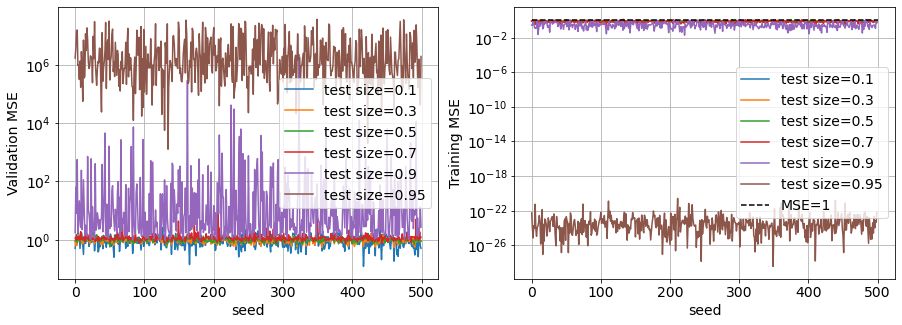

In [9]:
plt.figure(figsize=(15, 5))

print('Validation:')
ax = plt.subplot(1, 2, 1)
for k in range(0,len(testSizes)):
    plt.plot(mse_val_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_val_shuffle_on[k]), np.var(mse_val_shuffle_on[k])))
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

print('\nTraining:')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(testSizes)):
    plt.plot(mse_train_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_train_shuffle_on[k]), np.var(mse_train_shuffle_on[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.show()

#### MSE varia com a semente utilizada

Vejam que o **erro de validação** tem uma **grande variação** (consequentemente, alta variância), principalmente para o caso onde o conjunto de treinamento é bem menor do que o conjunto de validação. Isso acontece pois o modelo começa a sobreajustar.

Podemos perceber que a **variação do erro de validação depende da semente** utilizada na função **split**, ou seja, o **erro depende das amostras que foram escolhidas** para fazer parte dos conjuntos de treinamento e validação, os quais precisam ser representativos do modelo gerador. 

Este exemplo, mostra o efeito conhecido como **viés de seleção**.

Além disso, este exemplo mostra o efeito da variação do tamanho do conjunto de treinamento. 

Vemos que os erros de validação e treinamento se distanciam do valor mínimo do MSE, 1, conforme o tamanho do conjunto de treinamento diminui e o de validação aumenta. 

Como o **conjunto de treinamento diminui** e, consequentemente, a **probabilidade de se ter um conjunto representativo**, a qualidade do modelo tende a piorar, resultando em um modelo que diverge da solução ótima (i.e., mapeamento verdadeiro) e apresenta alta variância devido ao sobreajuste.

### Variable test size and shuffle = False

+ Exemplo utilizando uma função objetivo de ordem 5 e um polinômio aproximador também de ordem 5.

+ Percebam os diferentes conjuntos de treinamento e validação que serão utilizados.

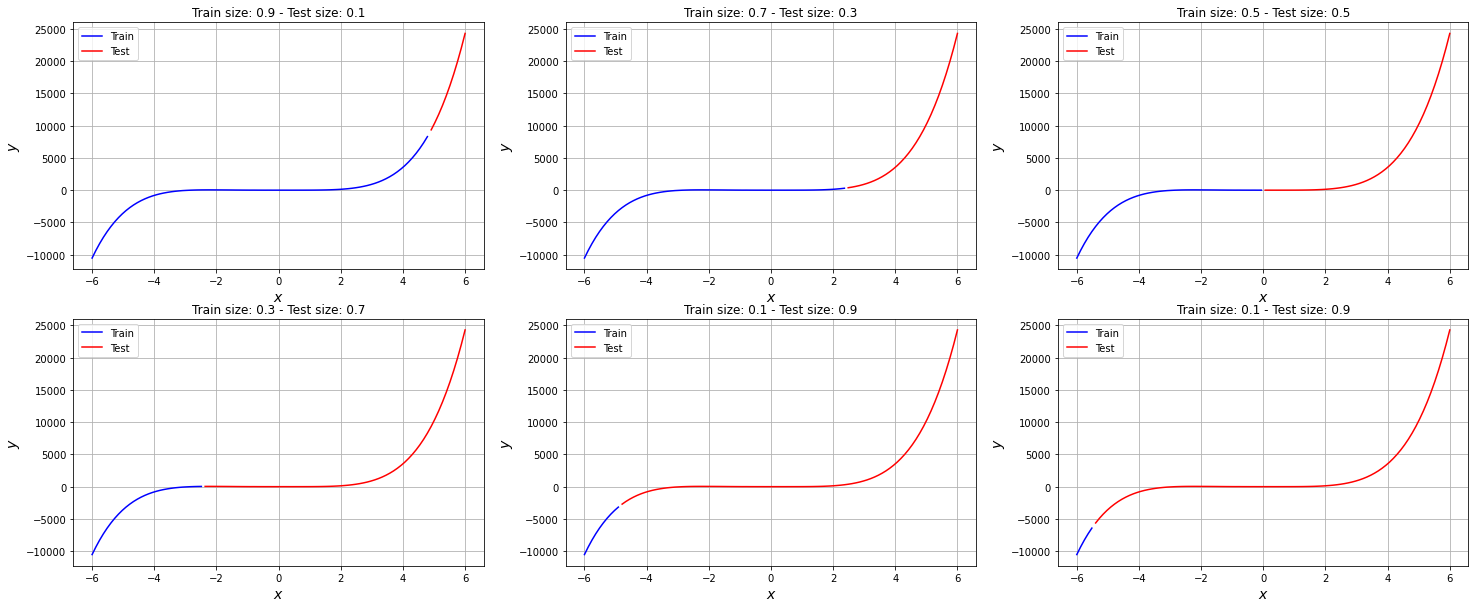

In [10]:
testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(25, 10))
for i in range(0, len(testSizes)):
    
    # Size of the validation set.
    tsize = testSizes[i]

    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=False)
    
    ax = plt.subplot(2, len(testSizes)//2, i+1)
    plt.plot(x_train, y_train, 'b', label='Train')
    plt.plot(x_val, y_val, 'r', label='Test')
    
    plt.title('Train size: %1.1f - Test size: %1.1f' % ((1.0-tsize), tsize))
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)    
    plt.grid()
    plt.legend()
    
plt.show()

----- 0.10 -----
MSE train: 0.8955704531723622
MSE val: 0.36508827877010475
---------------------
----- 0.30 -----
MSE train: 0.8819960238718223
MSE val: 28.537410617826673
---------------------
----- 0.50 -----
MSE train: 1.0656131173309107
MSE val: 5607.009966395144
---------------------
----- 0.70 -----
MSE train: 0.9405080226468896
MSE val: 7687235.106691815
---------------------
----- 0.90 -----
MSE train: 0.43698790398085674
MSE val: 101312033338255.52
---------------------
----- 0.95 -----
MSE train: 5.459392042849982e-24
MSE val: 186778794178.19092
---------------------


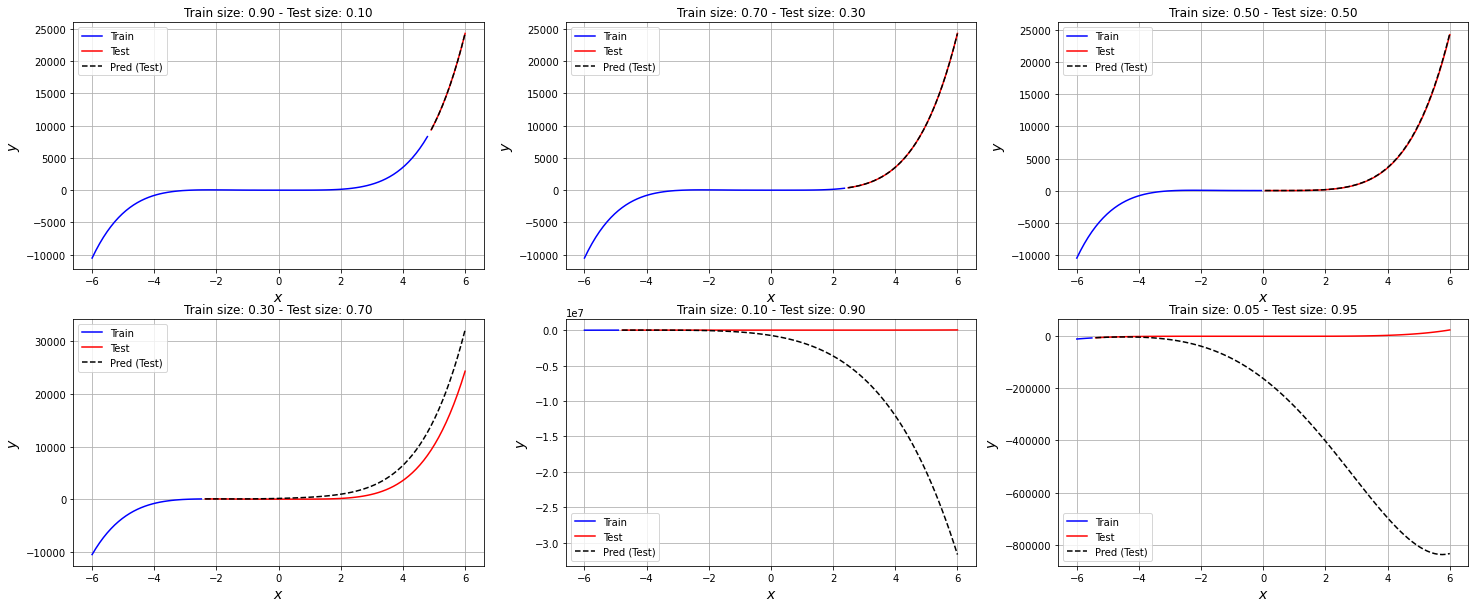

In [11]:
mse_val_shuffle_off = []
mse_train_shuffle_off = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

plt.figure(figsize=(25, 10))
for inc in range(0, len(testSizes)):
    
    # Size of the validation set.
    tsize = testSizes[inc]

    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=False)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)

    y_train_predict = poly_reg.predict(x_train)

    y_val_predict = poly_reg.predict(x_val)
    
    mse_val = mean_squared_error(y_val, y_val_predict)

    mse_val_shuffle_off.append(mse_val)

    mse_train = mean_squared_error(y_train, y_train_predict)
    
    mse_train_shuffle_off.append(mse_train)
    
    ax = plt.subplot(2, len(testSizes)//2, inc+1)
    plt.plot(x_train, y_train, 'b', label='Train')
    plt.plot(x_val, y_val, 'r', label='Test')
    plt.plot(x_val, y_val_predict, 'k--', label='Pred (Test)')
    
    plt.title('Train size: %1.2f - Test size: %1.2f' % ((1.0-tsize), tsize))
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)    
    plt.grid()
    plt.legend()
    
    print('----- %1.2f -----' % (tsize))
    print('MSE train:', mse_train)
    print('MSE val:', mse_val)
    print('---------------------')

Validation:
MSE mean: 16916469970884.1191 - MSE var: 1424526874632477603547578368.0000

Training:
MSE mean: 0.7034 - MSE var: 1.3700e-01


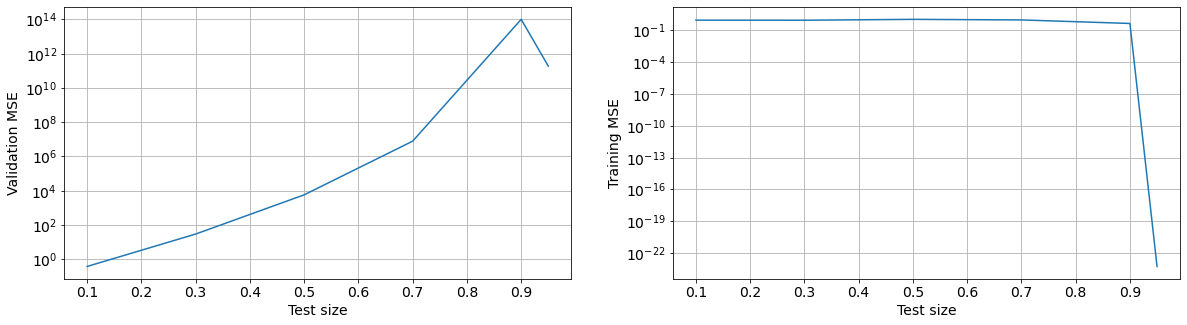

In [12]:
plt.figure(figsize=(20, 5))

print('Validation:')
print('MSE mean: %1.4f - MSE var: %1.4f' % (np.mean(mse_val_shuffle_off), np.var(mse_val_shuffle_off)))

ax = plt.subplot(1, 2, 1)
plt.plot(testSizes, mse_val_shuffle_off)
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0.1,1,0.1))

print('\nTraining:')
print('MSE mean: %1.4f - MSE var: %1.4e' % (np.mean(mse_train_shuffle_off), np.var(mse_train_shuffle_off)))

ax = plt.subplot(1, 2, 2)
plt.plot(testSizes, mse_train_shuffle_off)
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0.1,1,0.1))

plt.show()

#### O não embaralhamento resulta em alto erro de validação.

Percebam que o **erro de validação** quando não há embaralhamento da base de dados antes da divisão é bem maior do que o erro de validação quando os dados são embaralhados antes da divisão. 

Isso acontece, nesse exemplo, devido ao fato de que sem embaralhamento, o conjunto de validação contém uma parte da base de dados que não foi utilizada durante o treinamento, ou seja, os conjunto de treinamento e validação não são representativos do modelo gerador. 

Em outras palavras, o conjunto de treinamento contém amostras de uma região da curva que não estão no conjunto de validação. 

Lembre-se que ambos conjuntos devem ser representativos com relação ao modelo gerador.

##  k-Fold with variation of k and random seed

In [13]:
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

In [14]:
kfold_mean_vec = []
kfold_std_vec = []
idx = 0
splits = [2, 6, 10]
for k in splits:
    
    kfold_mean_vec.append([])
    kfold_std_vec.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=k, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        # Calculate the cross-validation score with kfold object.
        # OBS.: All scorer objects follow the convention that higher return values are better than lower return values. 
        #       Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
        #       are available as neg_mean_squared_error which return the negated value of the metric.
        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mean_vec[idx].append(scores.mean())
        kfold_std_vec[idx].append(scores.std())
    idx += 1

k = 2: MSE mean: 1.0146 - MSE var: 0.0102
k = 6: MSE mean: 0.9538 - MSE var: 0.0010
k = 10: MSE mean: 0.9485 - MSE var: 0.0004


k = 2: STD DEV mean: 0.1098 - STD DEV var:0.0059
k = 6: STD DEV mean: 0.2840 - STD DEV var:0.0069
k = 10: STD DEV mean: 0.3813 - STD DEV var:0.0070


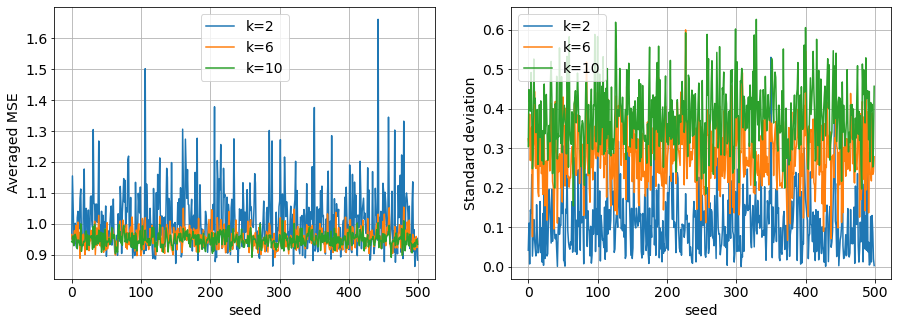

In [15]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
for k in range(0,len(splits)):
    plt.plot(kfold_mean_vec[k], label='k='+str(splits[k]))
    print('k = %d: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mean_vec[k]), np.var(kfold_mean_vec[k])))
plt.ylabel('Averaged MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\n')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(splits)):
    plt.plot(kfold_std_vec[k], label='k='+str(splits[k]))
    print('k = %d: STD DEV mean: %1.4f - STD DEV var:%1.4f' % (splits[k], np.mean(kfold_std_vec[k]), np.var(kfold_std_vec[k])))
plt.ylabel('Standard deviation', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Vemos que conforme k aumenta, o MSE tende a 1, o menor valor possível, e que a variância do MSE diminui.

A média do desvio padrão tende a aumentar com k, pois o número de amostras do conjunto de validação diminui, porém, assim como com a variância do MSE, a variância do desvio padrão diminui com o aumento de k.

## Comparison between Holdout and k-Fold

Para uma comparação mais justa, escolhemos `k` e `testsize` de forma que os conjuntos tenham aproximadamente o mesmo número de amostras

In [16]:
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

### Holdout

In [17]:
ho_mse_val_shuffle_on = []
ho_mse_train_shuffle_on = []

testSizes = [0.5, 0.3, 0.2, 0.1]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    ho_mse_val_shuffle_on.append([])
    ho_mse_train_shuffle_on.append([])
    
    for seedvar in range(0,500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        ho_mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        ho_mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

### k-Fold

In [18]:
kfold_mse_shuffle_on = []
kfold_std_shuffle_on = []
splits = [2, 3, 5, 10]
for idx in range(0, len(splits)):
    
    kfold_mse_shuffle_on.append([])
    kfold_std_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=splits[idx], shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mse_shuffle_on[idx].append(scores.mean())
        kfold_std_shuffle_on[idx].append(scores.std())

k = 2.0: MSE mean: 1.0146 - MSE var: 0.0102
t = 0.5: MSE mean: 1.0208 - MSE var: 0.0266

k = 3.0: MSE mean: 0.9734 - MSE var: 0.0035
t = 0.3: MSE mean: 0.9753 - MSE var: 0.0431

k = 5.0: MSE mean: 0.9562 - MSE var: 0.0012
t = 0.2: MSE mean: 0.9611 - MSE var: 0.0778

k = 10.0: MSE mean: 0.9485 - MSE var: 0.0004
t = 0.1: MSE mean: 0.9717 - MSE var: 0.1577



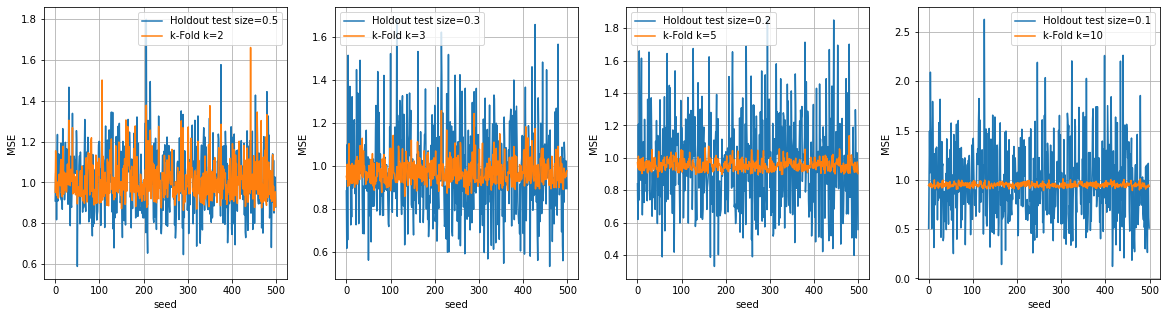

In [19]:
plt.figure(figsize=(20, 5))

for k in range(0,len(splits)):
    
    print('k = %1.1f: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mse_shuffle_on[k]), np.var(kfold_mse_shuffle_on[k])))
    print('t = %0.1f: MSE mean: %1.4f - MSE var: %1.4f\n' % (testSizes[k], np.mean(ho_mse_val_shuffle_on[k]), np.var(ho_mse_val_shuffle_on[k])))
    
    ax = plt.subplot(1, len(splits), k+1)
    plt.plot(ho_mse_val_shuffle_on[k], label='Holdout test size='+str(testSizes[k]))
    plt.plot(kfold_mse_shuffle_on[k], label='k-Fold k='+str(splits[k]))
    plt.ylabel('MSE')
    plt.xlabel('seed')
    plt.grid()
    plt.legend()

plt.show()

Como nós podemos ver, o k-Fold apresenta menor variação do erro em relação à mudança da semente, isto se torna mais evidente conforme k aumenta.

Como consequência de uma menor variação do erro, o k-Fold apresenta menor variância do erro, o que corresponde a uma menor dependência de como os conjuntos de treinamento e validação foram criados (ou seja, a forma como o k-Fold funciona faz com que os conjuntos sejam mais representativos do que os conjuntos criados com a estratégia do Holdout).

## Leave-P-Out

In [20]:
lpo_mse = []
lpo_std = []

psizes = [1, 2, 3]

for inc in range(0, len(psizes)):

    lpocv = LeavePOut(p=psizes[inc])

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = -lin_scores
    lpo_mse.append(scores.mean())
    lpo_std.append(scores.std())        

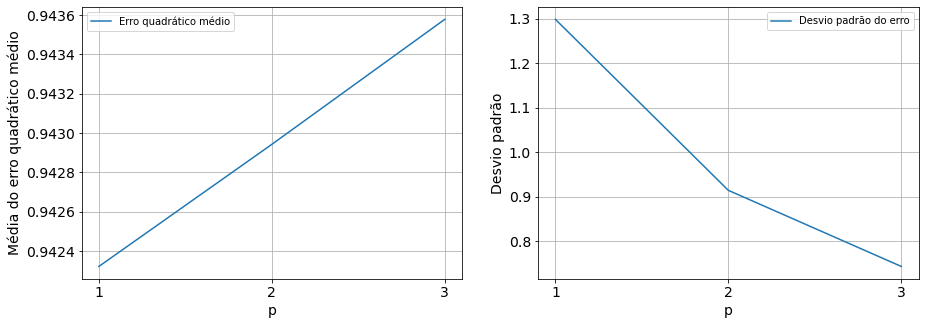

In [21]:
# Plot results.
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(psizes, lpo_mse, label='Erro quadrático médio')
plt.xlabel('p', fontsize=14)
plt.ylabel('Média do erro quadrático médio', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(psizes, lpo_std, label='Desvio padrão do erro')
plt.xlabel('p', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Show the plot.
plt.show()